In [70]:
# import stuff
import os
from keras.preprocessing.image import load_img, image_dataset_from_directory
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16

In [45]:
# load the model
model = VGG16()

In [103]:
breeds = []
with open("dog_breeds.txt", encoding = 'utf-8') as f:
     for line in f:
          line = str(line)
          breeds.append(line.replace('\n', ''))

In [104]:
# load an image from file
image = load_img('input/dog.jpg', target_size=(224, 224))

# load images from directory
directory_in_str = "input/mixed"
directory = os.fsencode(directory_in_str)
img_paths = []

for file in os.listdir(directory):
     filename = os.fsdecode(file)
     img = load_img(directory_in_str+ "/" + filename, target_size=(224, 224))
     img_paths.append(directory_in_str+"/"+filename)

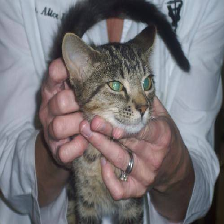

cat - Egyptian_cat (43.05%)




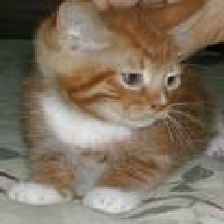

cat - tiger_cat (24.34%)




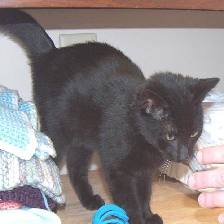

Dog - schipperke (93.18%)




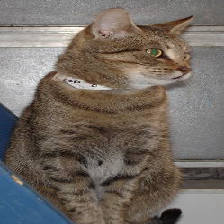

tabby (40.27%)




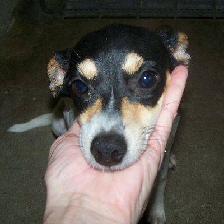

Dog - toy_terrier (86.14%)




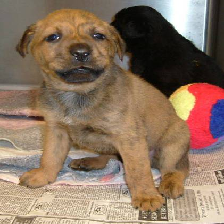

Dog - Border_terrier (13.16%)




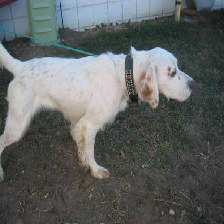

Dog - English_setter (96.67%)




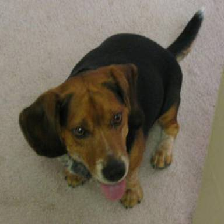

Dog - beagle (35.11%)




In [106]:
for path in img_paths:
     image_ = load_img(path, target_size=(224, 224))
     image = img_to_array(image_)
     image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
     image = preprocess_input(image)
     yhat = model.predict(image)
     label = decode_predictions(yhat)
     label = label[0][0]
     display(image_)
     if label[1] in breeds:
          print('Dog - %s (%.2f%%)' % (label[1], label[2]*100))
     elif 'cat' in label[1]:
          print('cat - %s (%.2f%%)' % (label[1], label[2]*100))
     else:
          print('%s (%.2f%%)' % (label[1], label[2]*100))
     print("\n")

In [55]:
# convert the image pixels to a numpy array
image = img_to_array(image)

In [56]:
# reshape data for the model
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))

In [57]:
# prepare the image for the VGG model
image = preprocess_input(image)

In [58]:
# predict the probability across all output classes
yhat = model.predict(image)

In [59]:
# convert the probabilities to class labels
label = decode_predictions(yhat)

In [60]:
# convert the probabilities to class labels
label = label[0][0]

In [61]:
# print the classification
print('%s (%.2f%%)' % (label[1], label[2]*100))

Labrador_retriever (60.21%)
